# EPRV 6: Sun-as-a-Star Splinter Part I

## Tutorial: Download NEID solar data from the NEID Archive at NExScI

This tutorial shows how to download NEID solar data using the NEID Archive Python API. To install the NEID Archive API:

`pip install git+https://github.com/Caltech-IPAC/pyNEID.git`

Let's start! First, import some needed packages.

In [1]:
from   astropy.io        import fits
from   glob              import glob
import matplotlib.pyplot as     plt
import numpy             as     np
import os
from   pyneid.neid       import Neid

Specify and create the output directory.

In [ ]:
output_directory = 'sun_neid_l2/'
os.makedirs(output_directory, exist_ok=True)

Specify some parameters, query one the solar DRP output files (in this case L2) and download them.

In [3]:
# Parameter: Date
date_min = '2021-01-14 00:00:00'
date_max = '2021-01-14 23:59:59'

# Parameters
param = dict()
param['datalevel'] = 'solarl2'
param['datetime' ] = date_min + '/' + date_max

# Query
Neid.query_criteria(param, format='csv', outpath=output_directory+'temp.tbl')

# Download L2 files
Neid.download(output_directory+'temp.tbl', 'solarl2', 'csv', output_directory, start_row=0, end_row=3)

# Delete temporary file
os.remove(output_directory+'temp.tbl')

submitting request...


/opt/anaconda3/envs/dace/lib/python3.10/site-packages/pyneid/neid/core.py:3879: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = bs.BeautifulSoup (self.statusstruct, 'lxml')


Result downloaded to file [sun_neid_l2/temp.tbl]
Start downloading 4 FITS data you requested;
please check your outdir: sun_neid_l2/ for  progress.
A total of new 4 FITS files downloaded.


Next, loop the downloaded FITS files and extract whatever data or header variable your analysis requires. Here, we extract the RVs.

In [4]:
# Files
files = glob(output_directory+'**/*.fits', recursive=True)
Nfile = len(files)

# Empty arrays for header variables
time_val = np.empty(Nfile)
vrad_val = np.empty(Nfile)
vrad_err = np.empty(Nfile)

# Loop files
for i in range(Nfile):

    # Open FITS file
    hdul = fits.open(files[i])

    # Extract header variables
    header = hdul[12].header
    time_val[i] = header['CCFJDMOD']
    vrad_val[i] = header['CCFRVMOD']
    vrad_err[i] = header['DVRMSMOD']

    # Close FITS file
    hdul.close()


Finally, plot the extracted data.

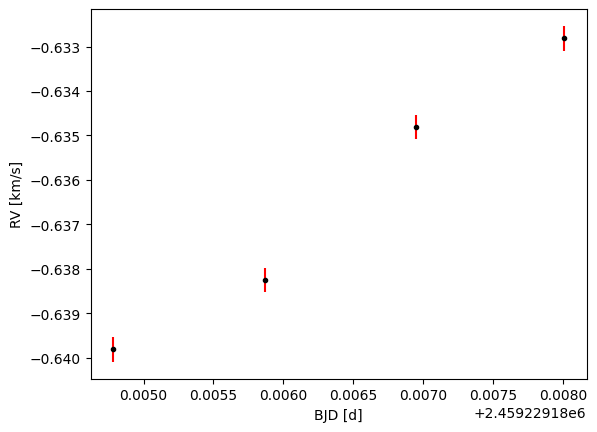

In [5]:
# RV time series
plt.figure()
plt.errorbar(time_val, vrad_val, vrad_err, fmt='.', color='k', ecolor='r')
plt.xlabel('BJD [d]')
plt.ylabel('RV [km/s]')
plt.show()